In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# K-Means with Scikit-Learn


n_init = 1
 centroids =
 [[184.28571429  17.76363636]
 [216.88372093  15.22403101]
 [195.10869565  18.60869565]]
 inertia = 9353.08291579671
 avg error = 27.189194522664852 



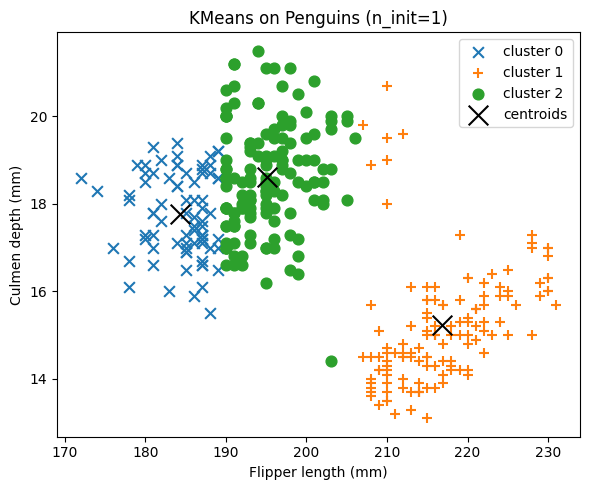

n_init = 5
 centroids =
 [[186.25438596  17.99035088]
 [216.9609375   15.18828125]
 [196.95098039  18.67352941]]
 inertia = 9123.212733730004
 avg error = 26.52096724921513 



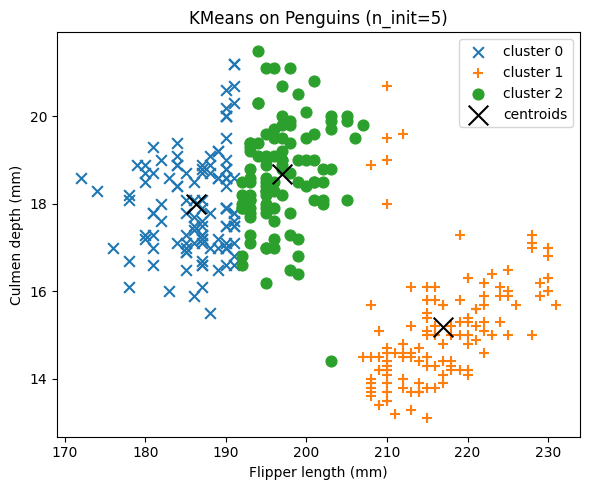

n_init = 10
 centroids =
 [[186.25438596  17.99035088]
 [216.9609375   15.18828125]
 [196.95098039  18.67352941]]
 inertia = 9123.212733730004
 avg error = 26.52096724921513 



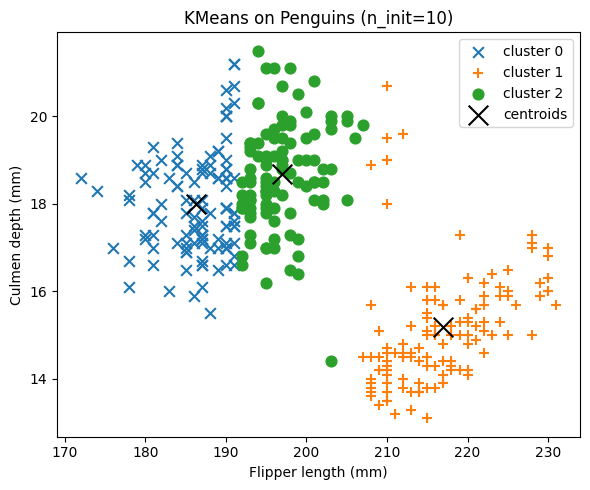

In [19]:
# Task 4 ~ scikit-learn KMeans on penguin data with inertia & avg_error,
df = pd.read_csv('data\\penguin.csv')
X = df[['flipper_length_mm', 'culmen_depth_mm']].dropna().values
k = 3
n_init_values = [1, 5, 10]
markers = ['x', '+', 'o']   # one marker shape per cluster

for n_init in n_init_values:
    # fit KMeans
    km = KMeans(n_clusters=k, init='k-means++',n_init=n_init, random_state=420)
    labels = km.fit_predict(X)
    centers = km.cluster_centers_

    # compute and print inertia & avg error
    inertia = km.inertia_
    avg_error = inertia / X.shape[0]
    print(f"n_init = {n_init}")
    print(" centroids =\n", centers)
    print(" inertia =", inertia)
    print(" avg error =", avg_error, "\n")

    # scatter plot: one marker per cluster, centroids as black 'x'
    plt.figure(figsize=(6,5))
    for cid, marker in enumerate(markers):
        mask = (labels == cid)
        plt.scatter( X[mask, 0], X[mask, 1], marker=marker,  s=60,label=f'cluster {cid}')
    
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='centroids')
    plt.xlabel('Flipper length (mm)')
    plt.ylabel('Culmen depth (mm)')
    plt.title(f'KMeans on Penguins (n_init={n_init})')
    plt.legend()
    plt.tight_layout()
    plt.show()
